## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tratamiento de dataset

#### Leer dataset

In [2]:
dataset = pd.read_csv('../Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


#### Dataset en variables independientes y dependientes

In [6]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values


## Dividir dataset en entrenamiento y prueba

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

## Escalado de variables

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Modelo de clasificación

#### Implementar modelo de clasificación

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)



KNeighborsClassifier()

## Predicción

In [8]:
y_predict = classifier.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Evaluar rendimiento del modelo

#### matriz de confusión

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

#### Interpretación gráfica

C:\Users\uriel\AppData\Local\Temp\ipykernel_16276\2807164798.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j,1],


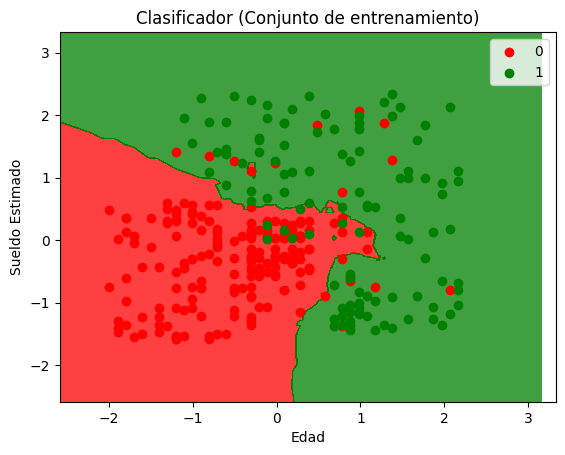

In [10]:
from matplotlib.colors import ListedColormap


x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max() +1, step = 0.01),
    np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max() +1, step = 0.01)
)

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j,1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Clasificador (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()
